<a href="https://colab.research.google.com/github/b4lbs/Ceub_IA/blob/main/Ceub_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos iniciar o desenvolvimento da árvore de decisão que classificará Iris. Para isso, vamos carregar o arquivo texto iris data para o Python. Vamos utilizar o Pandas

In [140]:
import pandas as pd
import sklearn 

In [141]:
#Nomeando colunas, por não ter no banco de dados - arquivo csv
nomeColunas = ['alturaSepala', 'larguraSepala', 'alturaPetala','larguraPetala','Classe']

In [142]:
base_iris = pd.read_csv('/content/iris.data', names=nomeColunas)

In [143]:
base_iris


,alturaSepala,larguraSepala,alturaPetala,larguraPetala,Classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [144]:
print(f'Quantidade de linhas: {len(base_iris)}')
print(f'Quantidade de colunas: {len(base_iris.columns)}')

Quantidade de linhas: 150
Quantidade de colunas: 5


In [145]:
base_iris.head()

,alturaSepala,larguraSepala,alturaPetala,larguraPetala,Classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [146]:
base_iris.tail(15)

,alturaSepala,larguraSepala,alturaPetala,larguraPetala,Classe
135,7.7,3.0,6.1,2.3,Iris-virginica
136,6.3,3.4,5.6,2.4,Iris-virginica
137,6.4,3.1,5.5,1.8,Iris-virginica
138,6.0,3.0,4.8,1.8,Iris-virginica
139,6.9,3.1,5.4,2.1,Iris-virginica
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica


In [147]:
base_iris['Classe'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classe, dtype: int64

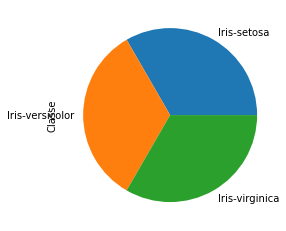

In [148]:
base_iris['Classe'].value_counts().plot(kind='pie');

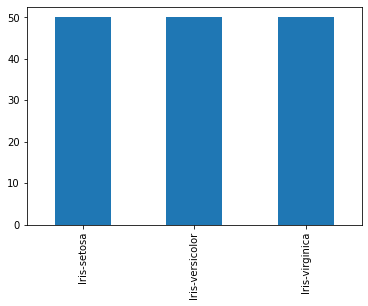

In [149]:
base_iris['Classe'].value_counts().plot(kind='bar');

In [150]:
print(f"Menor valor da coluna Sepala: {base_iris['alturaSepala'].min()}")

Menor valor da coluna Sepala: 4.3


In [151]:
print(f"Maior valor da coluna Sepala: {base_iris['alturaSepala'].max()}")

Maior valor da coluna Sepala: 7.9


In [152]:
#Adicionando colunas área Sepala e área Petala
base_iris['areaSepala'] = base_iris['alturaSepala'] * base_iris['larguraSepala']

In [153]:
base_iris['areaPetala'] = base_iris['alturaPetala'] * base_iris['larguraPetala']

In [154]:
base_iris.head()

,alturaSepala,larguraSepala,alturaPetala,larguraPetala,Classe,areaSepala,areaPetala
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28


In [155]:
#Separando atributos das classes
varIndependentes = base_iris.columns.difference(['Classe'], sort=False)

In [156]:
varIndependentes

Index(['alturaSepala', 'larguraSepala', 'alturaPetala', 'larguraPetala',
       'areaSepala', 'areaPetala'],
      dtype='object')

In [157]:
#Criação dos atributos
x = base_iris[varIndependentes].values

In [158]:
x


array([[ 5.1 ,  3.5 ,  1.4 ,  0.2 , 17.85,  0.28],
       [ 4.9 ,  3.  ,  1.4 ,  0.2 , 14.7 ,  0.28],
       [ 4.7 ,  3.2 ,  1.3 ,  0.2 , 15.04,  0.26],
       [ 4.6 ,  3.1 ,  1.5 ,  0.2 , 14.26,  0.3 ],
       [ 5.  ,  3.6 ,  1.4 ,  0.2 , 18.  ,  0.28],
       [ 5.4 ,  3.9 ,  1.7 ,  0.4 , 21.06,  0.68],
       [ 4.6 ,  3.4 ,  1.4 ,  0.3 , 15.64,  0.42],
       [ 5.  ,  3.4 ,  1.5 ,  0.2 , 17.  ,  0.3 ],
       [ 4.4 ,  2.9 ,  1.4 ,  0.2 , 12.76,  0.28],
       [ 4.9 ,  3.1 ,  1.5 ,  0.1 , 15.19,  0.15],
       [ 5.4 ,  3.7 ,  1.5 ,  0.2 , 19.98,  0.3 ],
       [ 4.8 ,  3.4 ,  1.6 ,  0.2 , 16.32,  0.32],
       [ 4.8 ,  3.  ,  1.4 ,  0.1 , 14.4 ,  0.14],
       [ 4.3 ,  3.  ,  1.1 ,  0.1 , 12.9 ,  0.11],
       [ 5.8 ,  4.  ,  1.2 ,  0.2 , 23.2 ,  0.24],
       [ 5.7 ,  4.4 ,  1.5 ,  0.4 , 25.08,  0.6 ],
       [ 5.4 ,  3.9 ,  1.3 ,  0.4 , 21.06,  0.52],
       [ 5.1 ,  3.5 ,  1.4 ,  0.3 , 17.85,  0.42],
       [ 5.7 ,  3.8 ,  1.7 ,  0.3 , 21.66,  0.51],
       [ 5.1 ,  3.8 ,  1.5 ,  0

In [159]:
#Criação da Classe
y = base_iris['Classe'].values

In [160]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [161]:
from sklearn.tree import DecisionTreeClassifier 

In [162]:
#Max depth é o maximo de ramos de um nó na árvore, a intenção é ter o menor número de ramos possível
#Random state está definindo a ordem de leitura dos dados (não é necessário)
#Objeto para construir a árvore de decisão
objClassificador = DecisionTreeClassifier(random_state=10,criterion='gini', max_depth=2)

In [163]:
#Gerou a árvore de decisão
objClassificador.fit(x,y)

DecisionTreeClassifier(max_depth=2, random_state=10)

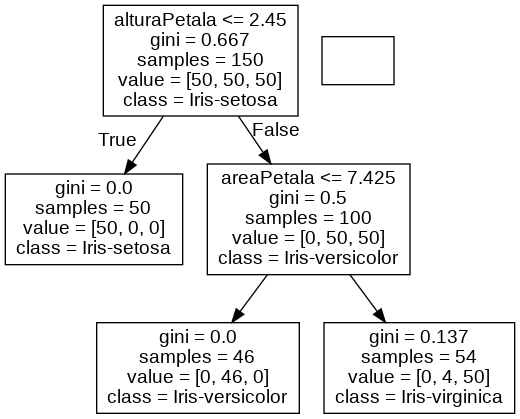

In [164]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(objClassificador, out_file=None, 
                                feature_names=varIndependentes,  
                                class_names=base_iris.Classe.unique())

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [165]:
#Usar árvore de decisão para prever resultados
iris1 = [5.1,3.5,1.4,0.2,17.85,0.28] #setosa
iris2 = [7.0, 3.2, 4.7,1.4,22.4,6.58] #versicolor
iris3 = [7.2,3.6,6.1,2.5,25.92,15.25] #virginica
iris4 = [5.0,2.4,1.8,0.2,12.0,0.36] #?????
conjuntoIris = pd.DataFrame([iris1,iris2,iris3,iris4], columns= varIndependentes)
conjuntoIris

,alturaSepala,larguraSepala,alturaPetala,larguraPetala,areaSepala,areaPetala
0,5.1,3.5,1.4,0.2,17.85,0.28
1,7.0,3.2,4.7,1.4,22.40,6.58
2,7.2,3.6,6.1,2.5,25.92,15.25
3,5.0,2.4,1.8,0.2,12.00,0.36


In [166]:
objClassificador.predict(conjuntoIris)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa'],
      dtype=object)

In [167]:
#A fim de evitar overfitting, iremos separar 10% dos registros para teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)
print(f'Quantidade de registros separados para treinamento: {len(x_train)}')
print(f'Quantidade de registros separados para teste: {len(x_test)}')

Quantidade de registros separados para treinamento: 127
Quantidade de registros separados para teste: 23


In [168]:
#Usando os registros de treinamento para treinar o modelo 
from sklearn.tree import DecisionTreeClassifier as dtc 
objClassificador2 = dtc(criterion='entropy', max_depth=2)
objClassificador2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

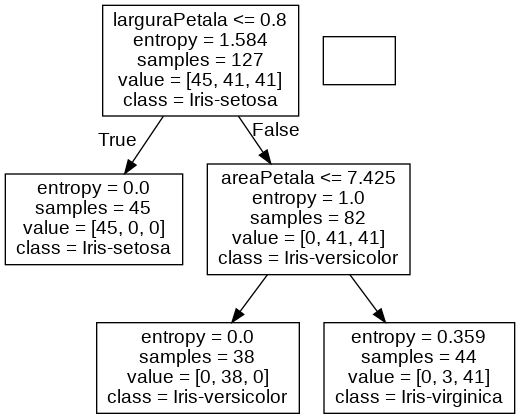

In [169]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(objClassificador2, out_file=None, 
                                feature_names=varIndependentes,  
                                class_names=base_iris.Classe.unique())

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [170]:
#vendo a acurácia/precisão do algoritimo
from sklearn.metrics import accuracy_score
y_pred = objClassificador2.predict(x_test)

In [171]:
accuracy_score(y_test, y_pred)

0.9565217391304348